In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [9]:
data, test, train, movies = pd.read_csv("data/data.csv"), pd.read_csv("data/test.csv"), pd.read_csv("data/train.csv"), pd.read_csv("data/movies.csv")


In [130]:
def gen_rating_freq_hist(df, title, filename):
    counts = df.Rating.value_counts()
    plt.bar(counts.index, counts.values)
    plt.xticks(np.arange(1,6))
    plt.title(title)
    plt.xlabel("rating")
    plt.ylabel("frequency")
    plt.savefig("./plots/" + filename + ".png")
    plt.show()
    

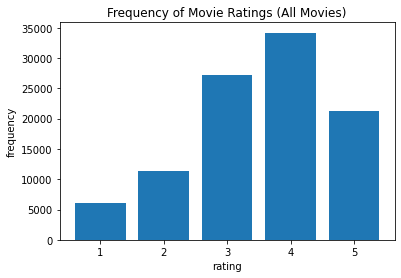

In [131]:
gen_rating_freq_hist(data, "Frequency of Movie Ratings (All Movies)", "1a")

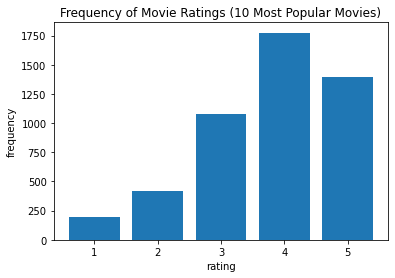

In [132]:
ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").count().rename(columns={"Rating":"Count"})
s = ratings.sort_values("Count")
popular_10_movies = s[-10:].index.array
popular_10_movies

popular_ratings = data[data["Movie ID"].isin(popular_10_movies)]
gen_rating_freq_hist(popular_ratings, "Frequency of Movie Ratings (10 Most Popular Movies)", "1b")

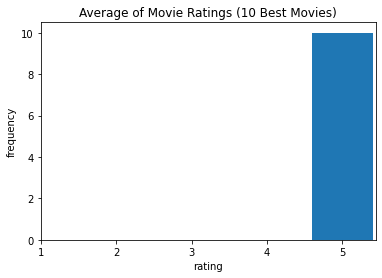

In [133]:
ratings = data[["Movie ID", "Rating"]].groupby("Movie ID").mean()
s = ratings.sort_values("Rating")
best_10_movies = s[-10:]
best_10_movies


gen_rating_freq_hist(best_10_movies, "Average of Movie Ratings (10 Best Movies)", "1c")

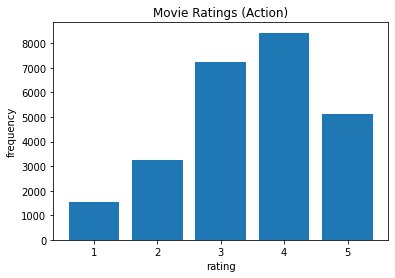

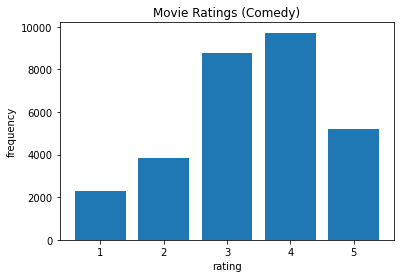

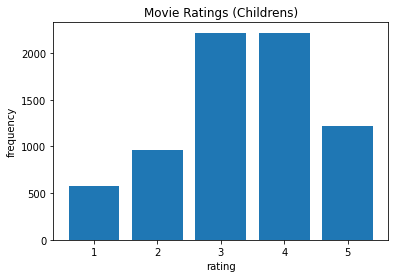

In [136]:
genres = ["Action", "Comedy", "Childrens"]

for genre in genres:
    ids_in_genre = movies[movies[genre] == 1]["Movie ID"]
    ratings_in_genre = data[data["Movie ID"].isin(ids_in_genre)]
    gen_rating_freq_hist(ratings_in_genre, "Movie Ratings ({})".format(genre), "1c_{}".format(genre))
    

In [135]:
movies

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
